In [41]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Display Dataset

In [42]:
# Opening JSON file and loading the data into a dictionary
with open('/home/users/elicina/Master-Thesis/Dataset/complaints-2021-05-14_08_16.json') as f:
    data = json.load(f)

# Normalize JSON data into a flat table
df = pd.json_normalize(data)


# Filter out rows where the 'description' column is empty or null
filtered_df = df[df['_source.company_public_response'].notna() & df['_source.company_public_response'].str.strip().astype(bool)]

# Sample a random row from the filtered DataFrame
random_row = filtered_df.sample(n=1, random_state=1)

# Display the selected row in a readable format
for index, row in random_row.iterrows():
    print(f"Row {index}:")
    for column in df.columns:
        print(f"{column}: {row[column]}")
    print("\n" + "="*40 + "\n")

Row 76538:
_index: complaint-public-v2
_type: complaint
_id: 1285374
_score: 0.0
_source.tags: None
_source.zip_code: 07302
_source.complaint_id: 1285374
_source.issue: Transaction issue
_source.date_received: 2015-03-16T12:00:00-05:00
_source.state: NJ
_source.consumer_disputed: No
_source.product: Credit card
_source.company_response: Closed with monetary relief
_source.company: JPMORGAN CHASE & CO.
_source.submitted_via: Referral
_source.date_sent_to_company: 2015-03-23T12:00:00-05:00
_source.company_public_response: Company chooses not to provide a public response
_source.sub_product: None
_source.timely: Yes
_source.complaint_what_happened: 
_source.sub_issue: None
_source.consumer_consent_provided: N/A




In [10]:
# Display information about the dataframe to understand its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [43]:
# Print the column names
print(df.columns.values)

unique_value_counts = df.nunique()
unique_value_counts



['_index' '_type' '_id' '_score' '_source.tags' '_source.zip_code'
 '_source.complaint_id' '_source.issue' '_source.date_received'
 '_source.state' '_source.consumer_disputed' '_source.product'
 '_source.company_response' '_source.company' '_source.submitted_via'
 '_source.date_sent_to_company' '_source.company_public_response'
 '_source.sub_product' '_source.timely' '_source.complaint_what_happened'
 '_source.sub_issue' '_source.consumer_consent_provided']


_index                                   1
_type                                    1
_id                                  78313
_score                                   1
_source.tags                             3
_source.zip_code                      9442
_source.complaint_id                 78313
_source.issue                          154
_source.date_received                 3444
_source.state                           62
_source.consumer_disputed                3
_source.product                         17
_source.company_response                 8
_source.company                          1
_source.submitted_via                    6
_source.date_sent_to_company          3309
_source.company_public_response          3
_source.sub_product                     72
_source.timely                           2
_source.complaint_what_happened      20931
_source.sub_issue                      205
_source.consumer_consent_provided        5
dtype: int64

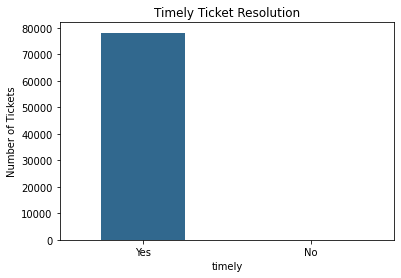

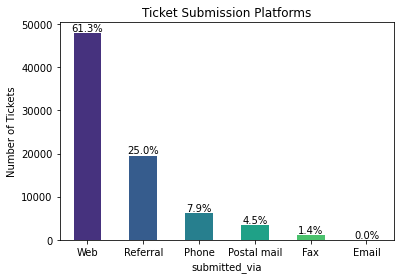

In [44]:
# Statistics for Submit_via and timely

timely_counts = df['_source.timely'].value_counts()

colors = sns.color_palette('viridis', len(timely_counts))
# Plot the counts
timely_counts.plot(kind='bar',  color=colors)
plt.title('Timely Ticket Resolution')
plt.xlabel('timely')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.show()

submission_counts = df['_source.submitted_via'].value_counts()

# Calculate the percentage
submission_percentages = submission_counts / submission_counts.sum() * 100

# Create a color palette
colors = sns.color_palette('viridis', len(submission_counts))

# Plot the counts
ax = submission_counts.plot(kind='bar', color=colors)
plt.title('Ticket Submission Platforms')
plt.xlabel('submitted_via')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)

# Annotate the percentages on top of the bars
for i, count in enumerate(submission_counts):
    percentage = submission_percentages[i]
    ax.text(i, count + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

## Data Cleaning

In [45]:
# Drop unnecessary columns
df = df.drop(columns=[
    '_index',"_id", "_source.state", '_type', '_source.zip_code', '_score', '_source.complaint_id',
    "_source.date_received", "_source.consumer_disputed", "_source.company_response", "_source.company",
    "_source.submitted_via", "_source.date_sent_to_company", "_source.company_public_response",
    "_source.timely", "_source.consumer_consent_provided"
])


# Rename columns for better readability
df.rename(columns={
    '_source.tags': 'tags',
    '_source.issue': 'issue',
    '_source.product': 'product',
    '_source.sub_product': 'sub_product',
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.sub_issue': 'sub_issue',
}, inplace=True)


# Print the updated column names
print("Columns are: ", df.columns.values)


Columns are:  ['tags' 'issue' 'product' 'sub_product' 'complaint_what_happened'
 'sub_issue']


In [46]:
# Replace empty strings with NaN
df = df.apply(lambda x: x.replace('', np.nan))

# Display information about the dataframe after modifications
df.info()
unique_value_counts = df.nunique()
unique_value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tags                     10900 non-null  object
 1   issue                    78313 non-null  object
 2   product                  78313 non-null  object
 3   sub_product              67742 non-null  object
 4   complaint_what_happened  21072 non-null  object
 5   sub_issue                32016 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


tags                           3
issue                        154
product                       17
sub_product                   72
complaint_what_happened    20930
sub_issue                    205
dtype: int64

In [47]:
# Count the number of unique values in each column and print the results
unique_value_counts = df.nunique()
unique_value_counts

tags                           3
issue                        154
product                       17
sub_product                   72
complaint_what_happened    20930
sub_issue                    205
dtype: int64

In [48]:
# Print unique values of specific columns to see if they can be used for labels for the classification part
print(f"Unique values of column 'tags': {df['tags'].unique()}")

Unique values of column 'tags': [None 'Servicemember' 'Older American' 'Older American, Servicemember']


In [49]:
print(f"Unique values of column 'product': {df['product'].unique()}")


Unique values of column 'product': ['Debt collection' 'Credit card or prepaid card' 'Mortgage'
 'Checking or savings account'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Consumer Loan' 'Credit card' 'Bank account or service'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Credit reporting' 'Payday loan' 'Prepaid card' 'Other financial service']


In [50]:
# Drop the 'tags' column as it's no longer needed, the values have no real meaning/connestion to the dataset
df = df.drop(columns=["tags"])

In [51]:
# Remove rows where 'complaint_what_happened' is NaN, because its our main column and main focus, we dont need empty complaints
df = df.dropna(subset=['complaint_what_happened'])

# Remove duplicate entries based on 'complaint_what_happened'
df = df.drop_duplicates(subset=['complaint_what_happened'])


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20930 entries, 1 to 78312
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   issue                    20930 non-null  object
 1   product                  20930 non-null  object
 2   sub_product              18823 non-null  object
 3   complaint_what_happened  20930 non-null  object
 4   sub_issue                12759 non-null  object
dtypes: object(5)
memory usage: 981.1+ KB


In [52]:
# Drop columns 'sub_issue' and 'issue' as they are no longer needed, they can not be used for any classification part or further use
# They have to many unique values and its just a small description of the complaint.
# In further steps we will use an LLM to create a summary of the ticket 
df = df.drop(columns=["sub_issue", "issue"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20930 entries, 1 to 78312
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product                  20930 non-null  object
 1   sub_product              18823 non-null  object
 2   complaint_what_happened  20930 non-null  object
dtypes: object(3)
memory usage: 654.1+ KB


In [53]:
# Group by 'product' and aggregate unique 'sub_product' values
product_subproduct_mapping = df.groupby('product')['sub_product'].unique().reset_index()

pd.set_option('display.max_colwidth', None)
# Display the mapping in tabular form
product_subproduct_mapping


,product,sub_product
0,Bank account or service,"[Checking account, Other bank product/service, Savings account, Cashing a check without an account, (CD) Certificate of deposit]"
1,Checking or savings account,"[Checking account, Savings account, Other banking product or service, CD (Certificate of Deposit), Personal line of credit]"
2,Consumer Loan,"[Vehicle loan, Installment loan, Vehicle lease, Pawn loan, Title loan]"
3,Credit card,[None]
4,Credit card or prepaid card,"[General-purpose credit card or charge card, Store credit card, General-purpose prepaid card, Payroll card, Government benefit card, Gift card]"
5,Credit reporting,[None]
6,"Credit reporting, credit repair services, or other personal consumer reports","[Other personal consumer report, Credit reporting, Credit repair services]"
7,Debt collection,"[Credit card debt, I do not know, Other debt, Other (i.e. phone, health club, etc.), Credit card, Auto, Private student loan debt, Mortgage debt, Auto debt, Mortgage, Payday loan debt, Payday loan, Non-federal student loan, Federal student loan]"
8,"Money transfer, virtual currency, or money service","[Domestic (US) money transfer, Mobile or digital wallet, Virtual currency, International money transfer, Check cashing service, Foreign currency exchange, Traveler's check or cashier's check, Money order, Refund anticipation check, Debt settlement]"
9,Money transfers,"[International money transfer, Domestic (US) money transfer]"


In [54]:
# Group by 'product' and count unique 'sub_product' values
unique_subproduct_counts = df.groupby('product')['sub_product'].nunique().reset_index()
unique_subproduct_counts.columns = ['product', 'Unique Sub-Product Count']
unique_subproduct_counts

,product,Unique Sub-Product Count
0,Bank account or service,5
1,Checking or savings account,5
2,Consumer Loan,5
3,Credit card,0
4,Credit card or prepaid card,6
5,Credit reporting,0
6,"Credit reporting, credit repair services, or other personal consumer reports",3
7,Debt collection,14
8,"Money transfer, virtual currency, or money service",10
9,Money transfers,2


In [55]:
# Group by 'product' and count unique 'sub_product' values
unique_subproduct_counts = df.groupby('product')['complaint_what_happened'].nunique().reset_index()
unique_subproduct_counts.columns = ['product', 'Unique complaint Count']
unique_subproduct_counts

,product,Unique complaint Count
0,Bank account or service,1649
1,Checking or savings account,4286
2,Consumer Loan,239
3,Credit card,2068
4,Credit card or prepaid card,5024
5,Credit reporting,38
6,"Credit reporting, credit repair services, or other personal consumer reports",1997
7,Debt collection,930
8,"Money transfer, virtual currency, or money service",797
9,Money transfers,56


In [56]:
# Define the products to remove
products_to_remove = ['Prepaid card', 'Payday loan']

# Remove rows with specific products
df = df[df['product'].apply(lambda x: x not in products_to_remove)]


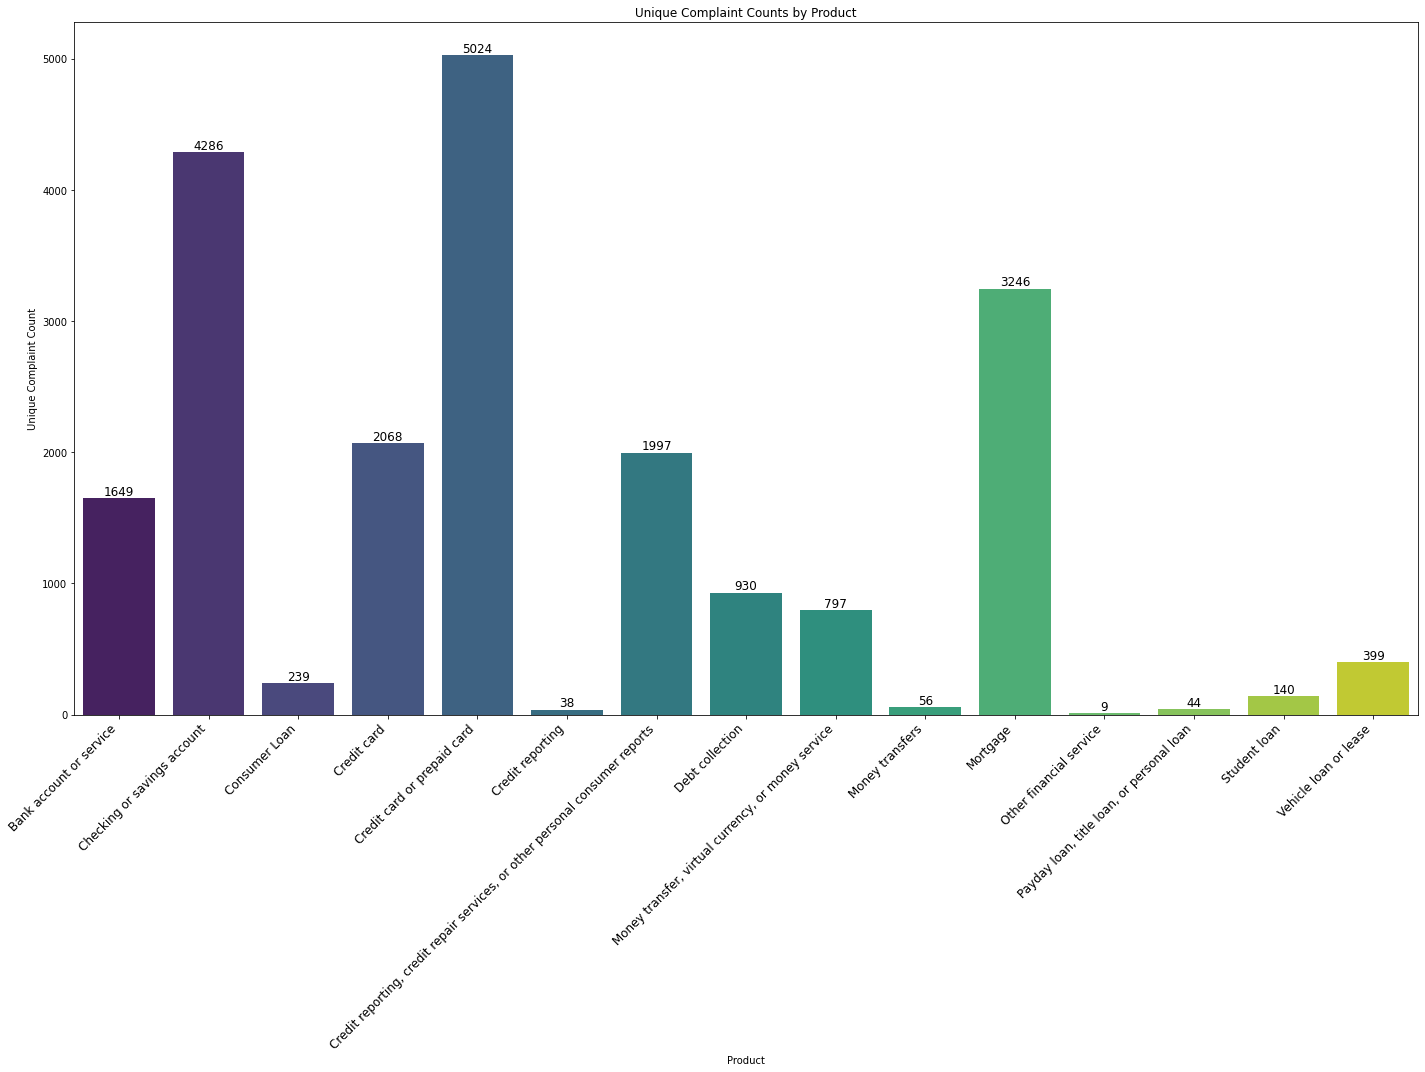

In [57]:
# Group by 'product' and count unique 'complaint_what_happened' values to see if its balanced between the products
unique_complaints_counts = df.groupby('product')['complaint_what_happened'].nunique().reset_index()
unique_complaints_counts.columns = ['product', 'Unique Complaints Count']

# Visualize the data
plt.figure(figsize=(20, 15))
sns.barplot(x='product', y='Unique Complaints Count', data=unique_complaints_counts, palette='viridis')

# Add title and labels
plt.title('Unique Complaint Counts by Product')
plt.xlabel('Product')
plt.ylabel('Unique Complaint Count')

# Rotate x-axis labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right', fontsize=12)

# Annotate the bars with the unique counts
for index, row in unique_complaints_counts.iterrows():
    plt.annotate(format(row['Unique Complaints Count'], '.0f'),
                     xy=(index, row['Unique Complaints Count']),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', fontsize=12)

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()

# Display the plot
plt.show()

## Category Mapping

In [58]:
# Define manualy categories with the corresponding products
categories = {
    "Bank Account Service": ["Checking or savings account", "Bank account or service"],
    "Loans": ["Consumer Loan", "Mortgage", "Payday loan, title loan, or personal loan", "Student loan", "Vehicle loan or lease"],
    "Credit and Prepaid Cards": ["Credit card", "Credit card or prepaid card"],
    "Credit Reporting and Debt Collection": ["Credit reporting", "Credit reporting, credit repair services, or other personal consumer reports", "Debt collection"],
    "Money Transfers and Financial Services": ["Money transfer, virtual currency, or money service", "Money transfers", "Other financial service"]
}

# Create a reverse mapping from subcategory to category
subcategory_to_category = {subcat: cat for cat, subcats in categories.items() for subcat in subcats}

# Map the subcategories to categories
df['category'] = df['product'].map(subcategory_to_category)

# Remove rows with NaN values in the 'product' column
df = df.dropna(subset=['product'])

# Drop the 'sub_product' column as it's no longer needed
df = df.drop(columns=["sub_product"])

# Display the updated DataFrame information
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20922 entries, 1 to 78311
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product                  20922 non-null  object
 1   complaint_what_happened  20922 non-null  object
 2   category                 20922 non-null  object
dtypes: object(3)
memory usage: 653.8+ KB


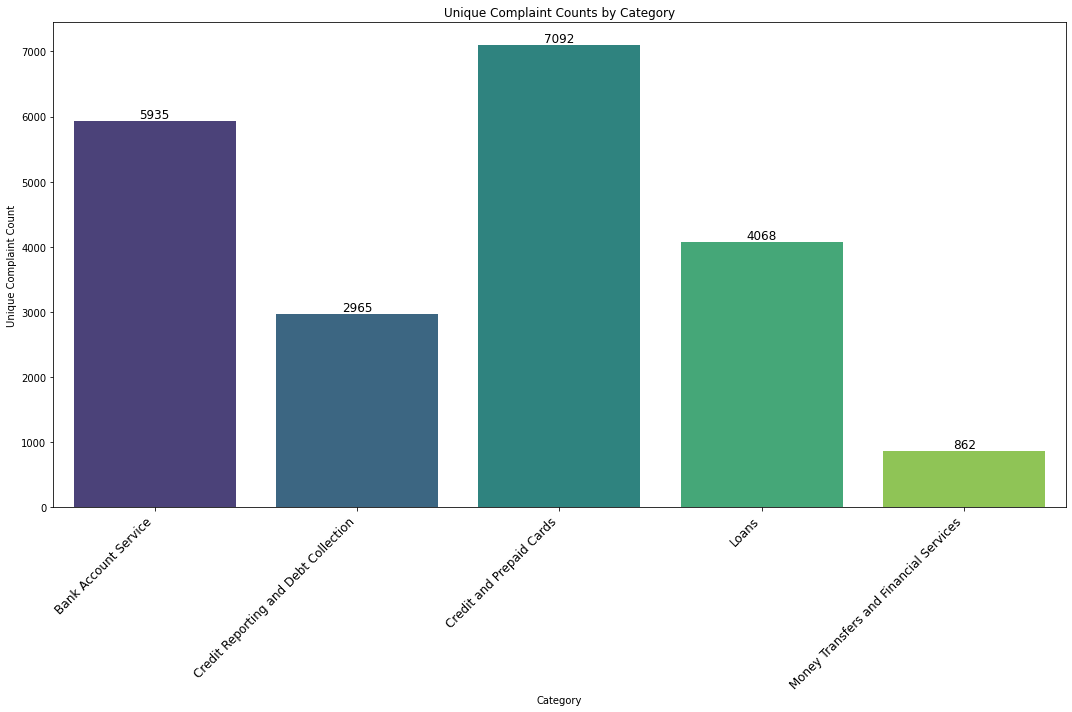

In [59]:
# Group by 'category' and count unique 'complaint_what_happened' values, to see if the data is balanced
unique_category_counts = df.groupby('category')['complaint_what_happened'].nunique().reset_index()
unique_category_counts.columns = ['category', 'Unique Complaint Count']

# Visualize the data
plt.figure(figsize=(15, 10))
sns.barplot(x='category', y='Unique Complaint Count', data=unique_category_counts, palette='viridis')

# Add title and labels
plt.title('Unique Complaint Counts by Category')
plt.xlabel('Category')
plt.ylabel('Unique Complaint Count')

# Rotate x-axis labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right', fontsize=12)

# Annotate the bars with the unique counts
for index, row in unique_category_counts.iterrows():
    plt.annotate(format(row['Unique Complaint Count'], '.0f'),
                     xy=(index, row['Unique Complaint Count']),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', fontsize=12)

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Encode categories using pandas' factorize method, for further classification
df = df.dropna(subset=['category'])
df['category_encoded'] = pd.factorize(df['category'])[0]
df

,product,complaint_what_happened,category,category_encoded
1,Debt collection,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Credit Reporting and Debt Collection,0
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit Cards and Prepaid Cards,1
10,"Credit reporting, credit repair services, or other personal consumer reports","Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Credit Reporting and Debt Collection,0
11,"Credit reporting, credit repair services, or other personal consumer reports","On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",Credit Reporting and Debt Collection,0
14,Checking or savings account,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,Bank Account or Service,2
...,...,...,...,...
78301,Checking or savings account,"My husband passed away. Chase bank put check on hold they paid my rent and car insurance, and said I was in the negative, I ask what did I need to do they said bring in $ XXXX XXXX and I would be out of the negative and I deposit $ XXXX, XX/XX/2018 then again I was in the negative for $ XXXX The I call on the phone for two hours no one could help me I went back into the bank again they said now I have s balance o

In [24]:
# Create a dictionary to map encoded categories to original category names
category_mapping = dict(zip(df['category_encoded'], df['category']))
category_mapping
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20922 entries, 1 to 78311
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product                  20922 non-null  object
 1   complaint_what_happened  20922 non-null  object
 2   category                 20922 non-null  object
 3   category_encoded         20922 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 817.3+ KB
